#Mutations in Gene Corps Workers

You're still in the process of prosecuting Gene Corp. One of the people on the case think that the workers at one of the subsidaries are much more likely to have genetic mutations than a control group. Prove that this is the case.

#Generate the Data

In [150]:
import numpy as np

We'll look at a 1500 bp window in 60 workers and 60 control people.

In [151]:
first_seq = np.random.choice(['A', 'G', 'T', 'C'], 1500, p=[.27, .26, .24, .23])

In [152]:
print "".join(first_seq)

GTAGAACAGGTGTGGTCATAACATAACCCGAGCAGTCCACGTATGTCTTATTGTGTCCTCTATATTCAGCGCAAACTGGCAGACATCAAACCGCTACCCTAGCCACTGATGTTGCATCAGTCATTAAGGACATAACGCAAGGTCATATAGCGTGAGAATCGCTAATCAGATTCGGTATGGCCGAAATTGAGAGAATAGCGTGCCTGAAGGGAATGGACGGTAAGGCTGTTCTATCTGTTTCTGTCGACGTGAGCAACGAAGTGATGAAAACAATTTCGAAAATGATCTTCGGGGCAGAAAGGTATTTGCCAAACGGAGTTTGAAGCCACACTATTGCAAGGCTCAAGGGTGTAAAGCGAAATTCATCAAGGAGCGCCTACCAGTTCGAAAACTGAGACTATCCATATAGACATCATTACCATAAGCATAACACTTCGAAGAGGCCCTGTGGAAATTTAGAACGTATTAATTTAAGCCGTAGAACTGACACGTCTTGTGCCTCCTACCACACTCCGCCACAGATAACACCGGCTCATGGGCAAAAATGCGGAATTGAATAGGCCATGGGAGAGTTCGGCCAAAATTGGCTCAAACCACTAATTATAGGATAAAAAGATTGCTTGCGAAGTCTGTGGTAGACCACGGTCCTGGAATTACGATGCACTCCACCGGTGCTGCGCGAAAGCCCTCCACAATTCCGACTGGTTACGGAGGAATAACACCAAATATCAGACCCGGGGACAGTTATGCCCCTTCCTACTACTCGAAGAACGGCTAATGGCCCAAAGCTTTTGTGGAGAACTTCGTATTTTGAAAAGTTTTCCTCCGGGGGTTCACACGCCGAACAATTACCCGAAATCGCCTATGGTTGATCTCCAGAAGTGCGATAACACAACGCCGATTAAATAAGCATGGACATCGATAACCGACCAGAGATCAGGACCTAGGATAGTAACGTTTCGAGAAGCACCGGTAGGTTGCTAAAAGGGATTGAAGTTGC

In [153]:
def mutate(seq, rate):
    """Makes a gaussian number of mutations in a sequence"""
    new_seq = seq.copy()
    num = int(np.random.normal(rate, 10))
    base = ['A', 'G', 'T', 'C']
    for i in xrange(num):
        new_seq[np.random.randint(0, len(seq)-1)] = np.random.choice(base, 1, p=[.27, .26, .24, .23])[0]
    return new_seq

In [154]:
new_seq = mutate(first_seq, 70)
print "".join(new_seq)
print 'differences: ', 1500-sum(first_seq==new_seq)

GTAGAACAGGTGTGGTCATAACTTAACCCGAGCAGTCCACGTATGTCTTATTGTGTCCTCTATATTCAGCGCAAACTGGCAGACATCAAACCGCTACCCTAGCCACTGACGTTGCATCAGTCATTAAGGACATAACGGAAGGTCATATAGCGTGAGAATCGCTAATCAGATTCGGTATGGCCGAATTTGAGAAAATAGCGTGCCTGAAGGGAATGGACGGTAAGGCTGTTCTCTCTGTTTCTTTCGACGTGAGCAACGAAGAGATGAAAACAATTTCGAAAATGATCTTCGGGGCGGTAAGGTATTTGCCAAACGGAGTTTGAAGCCACCCCAATGCAAGGCTCAAGGGTGTAAAGCGAAATTCATCAAGGAGCGCCTACCAGTCCGAAAACTGAGACTACCCATATAGACCTAATTACCATAAGCATAACACTTCGAAGAGGCCCTGTGGAAATTGAGAACGTATTAATTTAAGCCGTAGTACTGACACGTCTTGTGCCTCCTACCACACTCCGCCCCAGATAACACCGGCTCATGGGCAAAAATGCGGAATTCAATAGGCCATGGGAGAGTTCGGCCAAAATTGGCTCAAACCACTAAATATAGGATTAAAAGATTGCTTGCGAAGTCTGTGGTAGACCACGGTCCTGGAATTACGATGCACTCCACCGGTGTTGCGCGAAAGCCATCCACAAATCCGACTGGTTACGGAGGAATAACACCAAATATCAGACCCGGGGACAGTTATGCCCCTTCCTACTACTCGAAGAACAGCTAATGGCCCAAAGCTTTTGTGGAGAACTTCGTATTATGAAAAGTTTTCCTCCGGGGGTTCACACCCCGAACAATTACCCGAAATCGCCTATGGATGATCTCCAGAAGTGCGATAACACAACGCCGATTAAATAAGCATGGACATCGATAACCGACCAGAGATCAGGACCTAAGATAGTAACGTTTCGAGAAGCACCGGTAGGTTGCTAAAAGGGATTGAAGTTGC

Now we can actually generate our data:

In [156]:
controls = [mutate(first_seq, 70) for i in xrange(60)]

In [157]:
workers = [mutate(first_seq, 75) for i in xrange(60)]

In [158]:
all_seqs = controls + workers

#Find the Concensus Sequence

I would guess that the concensus sequence is the same as the first sequence I made, so I'll check, but it doesn't really matter. I just need to count the base at each position. The most popular base will be chosen. 

The first thing I'll have to do is zip the sequences. Then I can count and choose.

In [159]:
from collections import Counter

In [165]:
all_seqs_zip = zip(*all_seqs)
counts = [Counter(pos) for pos in all_seqs_zip]
concensus = [count.most_common(1)[0][0] for count in counts]
print concensus == first_seq.tolist()

True


#Find the Mutation Rate in Workers and Controls

We can make this as simple as counting a mutation if it doesn't match the concensus sequence.

In [166]:
control_mutations = []
for c in controls:
    mutation_count = sum([p1!=p2 for p1,p2 in zip(c,concensus)])
    control_mutations.append(mutation_count)
print control_mutations

[62, 50, 46, 51, 58, 49, 55, 55, 49, 50, 60, 42, 60, 46, 47, 58, 44, 53, 50, 48, 45, 51, 53, 55, 43, 56, 48, 45, 58, 43, 41, 44, 51, 45, 57, 62, 48, 49, 45, 58, 49, 66, 70, 52, 51, 39, 49, 63, 52, 60, 47, 48, 51, 53, 56, 55, 53, 60, 48, 54]


In [167]:
worker_mutations = []
for w in workers:
    mutation_count = sum([p1!=p2 for p1,p2 in zip(w,concensus)])
    worker_mutations.append(mutation_count)
print worker_mutations

[41, 58, 65, 56, 47, 53, 62, 53, 68, 56, 56, 53, 51, 57, 50, 43, 58, 77, 59, 47, 60, 58, 58, 56, 53, 63, 43, 52, 38, 56, 52, 51, 56, 62, 49, 36, 65, 58, 55, 55, 40, 55, 58, 45, 58, 57, 52, 56, 49, 58, 57, 57, 66, 53, 61, 41, 44, 50, 59, 67]


#Test if the Groups are Different

In [169]:
from scipy.stats import ttest_ind

In [170]:
ttest_ind(control_mutations, worker_mutations)

Ttest_indResult(statistic=-2.080527989371332, pvalue=0.039641273966124595)

#Plot (for Good Measure)

Let's plot these values as histograms just to visualze what's going on.

In [172]:
import matplotlib.pyplot as plt

In [174]:
import seaborn as sb

In [173]:
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [12.0, 9.0] #Larger than default of 6, 4
colors = plt.rcParams['axes.color_cycle']

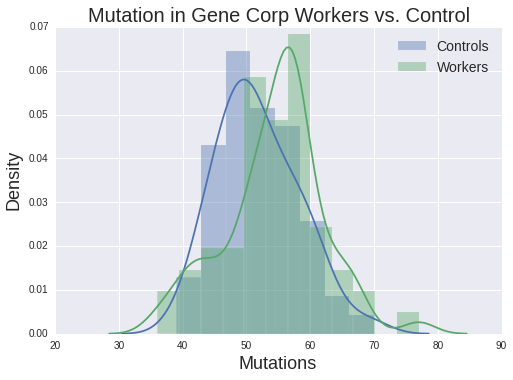

In [191]:
sb.distplot(control_mutations, label='Controls')
sb.distplot(worker_mutations, label='Workers')
plt.legend(fontsize=14)
plt.xlabel('Mutations', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title('Mutation in Gene Corp Workers vs. Control', fontsize=20)
plt.show()